# Hawaii-Emperor Chain Linear Regression

In [21]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

plt.rcParams.update({'font.size': 15}) #increase font size in plots
from sklearn.metrics import r2_score   #to find the coefficient of determination for the linear regression

### Import data

In [49]:
# Hawaiian/emperor chain exercise in python.

# This reads the three numeric columns into empdat
empdat=np.genfromtxt("emperor_data_kd.csv",skip_header=1,delimiter=",",
                     usecols=(1,2,3))

# This just reads the column of names
# empnames is the column of names in the original file
empnames=np.genfromtxt("emperor_data_kd.csv",skip_header=1,delimiter=",",
                     usecols=(0),dtype="str")

# These three 1-D numpy arrays are the three numeric data columns in
# the original file. 

distance=empdat[:,0]
age=empdat[:,1]
sigma=empdat[:,2]

### Assign variables to common inversion notation

In [94]:
#assign variables of inversion equation
d=age

N=len(distance)

P=2 #unkowns

determination=N-P
if determination > 0:
    det=str('over-determined')
    
elif determination == 0:
    det=str('exactly determined')

else:
    det=str('under-determined')
print("The problem is",det)

#create empty matrix
G=np.zeros((N,2))
#fill matrix with xi and 1, the coefficients of m
G[:,0]=distance
G[:,1]=np.ones(N)

The problem is over-determined


### Least-squares

In [4]:
#calculate least-squares solution for unknowns
m = np.linalg.inv((G.T)@G)@(G.T)@d
m

array([ 0.01682767, -2.40309107])

In [97]:
#calculate covarience matrix of the solution for unknowns 
S=((d-G@m).T)@(d-G@m)
C=((1/(N-P))*S)*(np.linalg.inv((G.T)@G))
print("covariance matrix =",C)

covariance matrix = [[ 5.21854461e-08 -4.80320986e-05]
 [-4.80320986e-05  8.88121975e-02]]


In [98]:
#calculate plate velocity
v=1/m[0]
v # in km/Mya
#standard error in velocity
ve= np.sqrt(v)*np.sqrt(C[0,0])/m[0] 
print("velocity =",v,"+/-",ve)

velocity = 59.42593458325372 +/- 0.10464987913829742


### Weighted Least-squares

In [57]:
#assume no covariances in only measured data Cd (i.e. data are independent) and all variances are equal
S=((d-G@m).T)@(d-G@m)
variance=S/(N-P) 
estimated_error=np.sqrt(variance) # this can be used as an assumption of the standard deviation at the origin
sigma[0]=estimated_error

In [62]:
#vary sigma at Kilauea and test the result on the estimated model vector
errors=(0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,estimated_error) #effect of varying error at Kilauea
grads=np.zeros((0,3))
for i in errors:
    sigma[0]=i #error at Kiluea
    
    #normalise d and G (for non-correlated variables)
    dn= d/sigma
    #Gn=G@(np.linalg.inv(sigma))
    Gn=G/sigma[:,None]

    #calculate weighted least-squares solution for unknowns
    mn = np.linalg.inv((Gn.T)@Gn)@(Gn.T)@dn
    info=i,mn[0],mn[1]
    grads = np.vstack([grads, info])

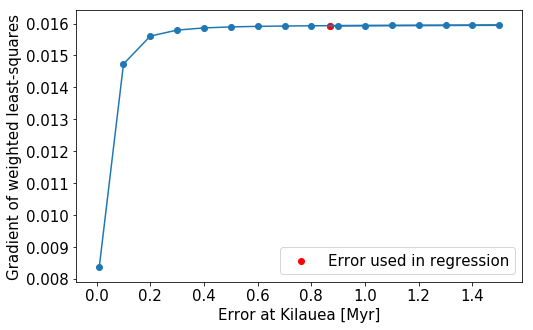

In [83]:
#plot change in gradient
plt.figure(figsize=((8,5)))
plt.plot(grads[:,0], grads[:,1])
plt.scatter(grads[:,0], grads[:,1])

plt.ylabel("Gradient of weighted least-squares")
plt.xlabel("Error at Kilauea [Myr]")
plt.scatter(estimated_error,grads[-1,1],color="red",marker="o", label="Error used in regression") # highlight selected error at Kiluea
plt.legend()

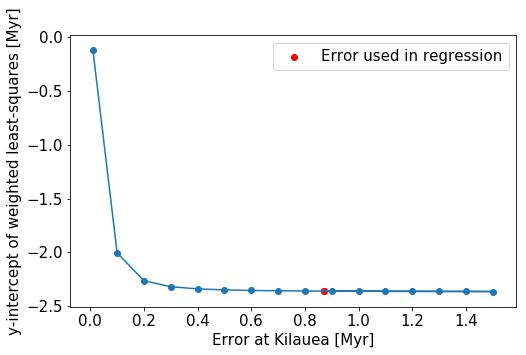

In [85]:
#plot change in y-intercept
plt.figure(figsize=((8,5)))
plt.plot(grads[:,0], grads[:,2])
plt.scatter(grads[:,0], grads[:,2])

plt.ylabel("y-intercept of weighted least-squares [Myr]")
plt.xlabel("Error at Kilauea [Myr]")
plt.scatter(estimated_error,grads[-1,2],color="red",marker="o", label="Error used in regression") # highlight selected error at Kiluea
plt.legend()

In [58]:
sigma[0]=estimated_error
#normalise d and G (for non-correlated variables)
dn= d/sigma
#Gn=G@(np.linalg.inv(sigma))
Gn=G/sigma[:,None]
Gn

#calculate weighted least-squares solution for unknowns
mn = np.linalg.inv((Gn.T)@Gn)@(Gn.T)@dn
mn

array([ 0.01593171, -2.35958434])

In [12]:
print("m_normalised=",mn)
print("m =",m)

m_normalised= [ 0.01593171 -2.35958434]
m = [ 0.01682767 -2.40309107]


In [13]:
#calculate weighted covarience of the solution for unknowns 
Sn=((dn-Gn@m).T)@(dn-Gn@m)
Cn=((1/(N-P))*S)*(np.linalg.inv((Gn.T)@Gn))

In [14]:
#error in weighted velocity
vne= np.sqrt(v*Cn[0,0])/mn[0]
#vne=v*np.sqrt((Cn[0,0])/mn[0])

#error in slowness for ordinary and weighted
err=np.sqrt(C[0,0])
err
errn=np.sqrt(Cn[0,0])
errn

0.00013931301789488475

### Plotted Least-squares solutions

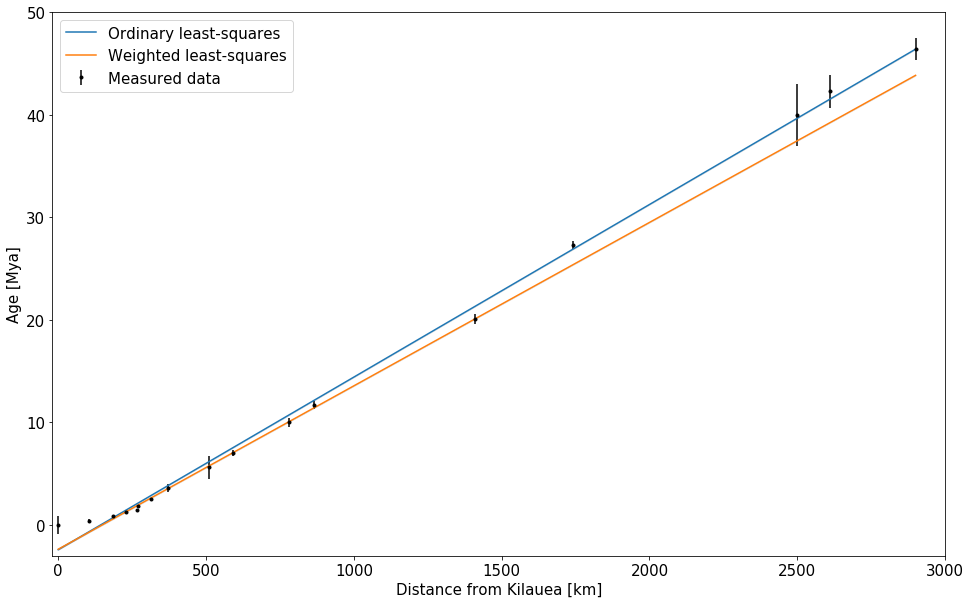

In [104]:
plt.figure(figsize=((16,10)))
#plt.scatter(distance,d)
plt.plot(distance,m[0]*distance+m[1], label="Ordinary least-squares")#, color="green")
plt.plot(distance,mn[0]*distance+mn[1], label="Weighted least-squares")#, color="green")
# creating errorbars
plt.errorbar(distance, d, color='black',
             yerr = sigma,
             fmt ='.', label='Measured data')
#error in gradient estimation
plt.fill_between(distance, m[0]*distance+m[1] - err, m[0]*distance+m[1] + err, color='gray', alpha=0.2)
plt.fill_between(distance, mn[0]*distance+mn[1] - errn, mn[0]*distance+mn[1] + errn, color='gray', alpha=0.2)

plt.ylabel('Age [Mya]')
plt.xlabel('Distance from Kilauea [km]')
plt.xlim(-20,3000)
plt.ylim(-3,50)
plt.legend()

In [17]:
print("Plate Velocity is ",v, "+/-",ve, "km/Mya")
print("Plate velocity using weighted least-squares is", 1/mn[0],"+/-",vne, "km/Mya")

Plate Velocity is  59.42593458325372 +/- 0.10464987913829742 km/Mya
Plate velocity using weighted least-squares is 62.767919542521575 +/- 0.06740893173211465 km/Mya


### Coefficient of Determination

In [150]:
#calculate the coefficient of determination for both models
r2 = r2_score(d, m[0]*distance+m[1])
r2n = r2_score(d, mn[0]*distance+mn[1])

print("r^2=",r2)
print("r^2_n=",r2n)
##the coefficient for determination is lower for the weighted least-squares 

r^2= 0.9972432726436755
r^2_n= 0.991901969108286


## Removing non-linear volcanoes from the regression analysis
#### Repeat steps to estimate ordinary and weighted m_hat without several datapoints

In [106]:
distance2=empdat[3:-1,0]
age2=empdat[3:-1,1]
sigma2=empdat[3:-1,2]

#assign variables of inversion equation
d2=age2

N2=len(distance2)

P2=2 #unkowns

determination=N2-P2
if determination > 0:
    det=str('over-determined')
    
elif determination == 0:
    det=str('exactly determined')

else:
    det=str('under-determined')
print("The problem is",det)

#create empty matrix
G2=np.zeros((N2,2))
#fill matrix with xi and 1, the coefficients of m
G2[:,0]=distance2
G2[:,1]=np.ones(N2)

#calculate least-squares solution for unknowns
m2 = np.linalg.inv((G2.T)@G2)@(G2.T)@d2

#normalise d and G (for non-correlated variables)
dn2= d2/sigma2
#Gn=G@(np.linalg.inv(sigma))
Gn2=G2/sigma2[:,None]

#calculate weighted least-squares solution for unknowns
mn2 = np.linalg.inv((Gn2.T)@Gn2)@(Gn2.T)@dn2

The problem is over-determined


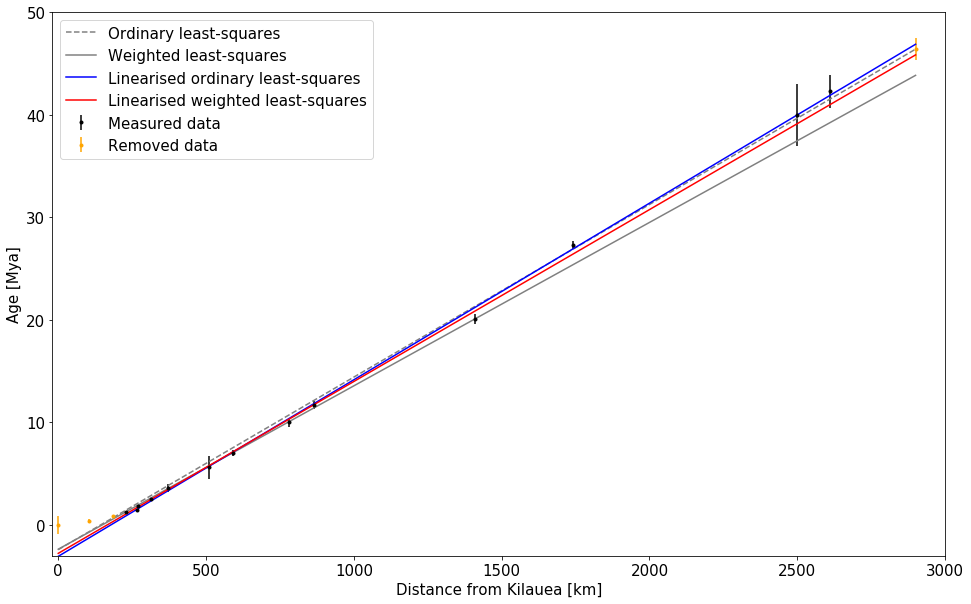

In [118]:
plt.figure(figsize=((16,10)))
#plot all m_hat
plt.plot(distance,m[0]*distance+m[1], label="Ordinary least-squares", color="grey", linestyle="--")
plt.plot(distance,mn[0]*distance+mn[1], label="Weighted least-squares", color="grey", linestyle="-")
plt.plot(distance,m2[0]*distance+m2[1], label="Linearised ordinary least-squares", color="blue")
plt.plot(distance,mn2[0]*distance+mn2[1], label="Linearised weighted least-squares", color="red")
# creating errorbars
plt.errorbar(distance[3:-1], d[3:-1], color='black',
             yerr = sigma[3:-1],
             fmt ='.', label='Measured data')

plt.errorbar(distance[0:3],d[0:3],color='orange', yerr=sigma[0:3], fmt='.')
plt.errorbar(distance[-1],d[-1],color='orange', yerr=sigma[-1], fmt='.', label='Removed data')

plt.ylabel('Age [Mya]')
plt.xlabel('Distance from Kilauea [km]')
plt.xlim(-20,3000)
plt.ylim(-3,50)
plt.legend()

In [105]:
#calculate all coefficients of determination
r2 = r2_score(d, m[0]*distance+m[1])
r2n = r2_score(d, mn[0]*distance+mn[1])
r2f = r2_score(d2, m2[0]*distance2+m2[1])
r2nf = r2_score(d2, mn2[0]*distance2+mn2[1])
r2fa = r2_score(d, m2[0]*distance+m2[1])
r2nfa = r2_score(d, mn2[0]*distance+mn2[1])

print("r^2=",r2)
print("weighted r^2=",r2n)
print("linear r^2 without non-linear data=",r2f)
print("weighted linear r^2 without non-linear data=",r2nf)
print("linear r^2 with non-linear data=",r2fa)
print("weighted linear r^2 with non-linear data=",r2nfa)

r^2= 0.9972432726436755
weighted r^2= 0.991901969108286
linear r^2 without non-linear data= 0.9991677381916136
weighted linear r^2 without non-linear data= 0.9983484648123917
linear r^2 with non-linear data= 0.9963596201558291
weighted linear r^2 with non-linear data= 0.9964885277984384
